### Imports

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import re

# Data Scientists and engineers salary compared to software developers and other software professionals

## Author: Georgi Datskov

## Table of contents
- Abstract
1. Reading the datasets  
      1.1. Stack Overflow Dataset  
      1.2. Glassdoor dataset  
2. Cleaning the datasets  
      2.1. Cleaning Stack Overflow dataframe  
      2.2. Cleaning Glassdoor dataframe  
3. Data exploration and preparation for analysis  
      3.1. Stack Overflow data exploration  
      3.2. Glassdoor data exploration  
4. Data analysis  
      4.1. Stack overflow survey data analysis  
          4.1.1. TODO  
      4.2. Glassdoor data analysis  
          4.2.1. TODO  
5. Conclusions  
    - TODO
6. Sources  

## Abstract

The goal of this study is to show how Data Scientists and Engineers salaries are compared to Software Developers and other Software Professionals in 2020.

Two independant sources of data are used for the comparison:

1. Glassdoor website scraped data on job postings in 2020 provided by github user "picklesueat".  
Glassdoor is an American website where current and former employees anonymously review companies and allows its users to anonymously submit and view salaries as well as search and apply for jobs on its platform.

2. Stack Overflow 2020 users survey dataset.  
Stack Overflow is a question and answer website for professional and enthusiast programmers. It is the flagship site of the Stack Exchange Network.

The Glassdoor dataset provides insight of what USA companies and job hunters offer as annual salary in 2020 to Data Scientists, Data Engineers, Data Analyzers and Machine Learning Engineers compared by their level of experience.

The Stack Overflow users survey dataset provides insight of the salary, experience and tech stack of all types of software professionals worldwide.

From the extracted and transformed data we get a lot of comparisons and everybody interested in software professionals salaries could easily answer themselves a lot of questions they might have on that topic.

Unfortunately I couldn't finish it entirely and it will need some more work.

## 1. Reading the datasets

### 1.1. Stack Overflow Dataset

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
stack_overflow_survey_2020_questions = pd.read_csv("./data/stack_overflow_survey_2020/survey_results_schema.csv")
stack_overflow_survey_2020_questions

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [4]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 50)

In [5]:
stack_overflow_survey_2020 = pd.read_csv("./data/stack_overflow_survey_2020/survey_results_public.csv")
stack_overflow_survey_2020

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
stack_overflow_survey_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

### 1.2. Glassdoor dataset
The dataset is split into categories, so we read 4 files

In [7]:
pd.set_option('display.max_colwidth', 100)

In [8]:
glassdoor_data_analysts = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataAnalyst.csv")
glassdoor_biz_analysts = pd.read_csv("./data/picklesueat_data_science_collection_2020/BusinessAnalyst.csv")
glassdoor_engineers = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataEngineer.csv")
glassdoor_scientists = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataScientist.csv")

In [9]:
glassdoor_data_analysts

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justice (CIJ)",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sift...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical support for the integration of multiple data sourc...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team [Customer Operations]",$37K-$66K (Glassdoor est.),"We’re looking for a Senior Data Analyst who has a love of mentorship, data visualization, and ge...",3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe collaborate. We create. We innovate.\n\nIntrigued?\...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a world-class team of brands and products all built with...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),"KORE1, a nationwide provider of staffing and recruiting solutions, has an immediate opening for ...",4.9,KORE1 Technologies\n4.9,"San Jose, CA","Irvine, CA",51 to 200 employees,2005,Company - Private,Staffing & Outsourcing,Business Services,$10 to $25 million (USD),"CyberCoders, Kforce, ASGN Incorporated",-1
5627,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Job Description\nHi\n\nHope you are doing great\nPlease go through the below JD and let me know ...,4.4,Adwait Algorithm\n4.4,"Santa Clara, CA","Houston, TX",51 to 200 employees,2015,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
5628,Data Analyst Junior,$44K-$82K (Glassdoor est.),"Job Description\nJob description\nInterpret data, analyze results using statistical techniques a...",5.0,"Staffigo Technical Services, LLC\n5.0","Fremont, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
5629,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\n\nThe Sr. HR Data Analyst position will lead analytical initiatives as well a...,3.5,Cepheid\n3.5,"Sunnyvale, CA","Sunnyvale, CA",1001 to 5000 employees,1996,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500 million to $1 billion (USD),-1,-1


In [10]:
glassdoor_data_analysts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5631 non-null   object 
 1   Salary Estimate    5631 non-null   object 
 2   Job Description    5631 non-null   object 
 3   Rating             5631 non-null   float64
 4   Company Name       5629 non-null   object 
 5   Location           5631 non-null   object 
 6   Headquarters       5631 non-null   object 
 7   Size               5631 non-null   object 
 8   Founded            5631 non-null   int64  
 9   Type of ownership  5631 non-null   object 
 10  Industry           5631 non-null   object 
 11  Sector             5631 non-null   object 
 12  Revenue            5631 non-null   object 
 13  Competitors        5631 non-null   object 
 14  Easy Apply         5631 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 660.0+ KB


In [11]:
glassdoor_biz_analysts

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD Anderson Cancer Center",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help Desk Analyst II\n\nCompensation: DOE\n\nRobert Half...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),"Job Title: System Analyst (Data) - PL/SQl Server\nLocation: Jacksonville, FL\nDuration: Full-tim...",3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and Supply Chain Management ),$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Application Manager. The Programmer Analyst analyzes...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist Health (Florida), North Florida Regional Medical ...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is needed for a Direct-Hire Loss Mitigation Quality ...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Robert Half",-1,NaN,NaN


In [12]:
glassdoor_biz_analysts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


In [13]:
glassdoor_engineers

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management advisory firm dedicated to helping our clients opti...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experience required),$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, and maintain efficient data pipelines, utilizing a v...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overview:\n\nSeeking a highly qualified Data Engineer wi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),"About the Position\n\n\nThis position will support Jane Street’s client-facing trading business,...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienced\nJob Location\nNew York (Home Office) - New Yor...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),"The Expertise You Have Proven expertise in developing applications using Spring, Spark and AWS t...",4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA Design Electrical Engineer with experience in PCB ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),"Posting Title Principal Data Engineer (Contractor) Job Locations Irving, TX ( remote flexibility...",3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc is currently seeking a seasoned ETL Lead with a pa...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [14]:
glassdoor_engineers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


In [15]:
glassdoor_scientists

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more tr...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods to help our users create healthier lifestyles, and...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Je...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription\nEdelman Intelligence is seeking a Director-level...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [16]:
glassdoor_scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

## 2. Cleaning the datasets
The datasets are quite clean from the get-go, but still, a few things can be fixed.  
Some columns are not needed and can be dropped, as they are not relevant to the research

### 2.1. Cleaning Stack Overflow dataframe

   1. The following columns are dropped:
        - Main branch;
        - Respondent ID;  
        - Age-, sex- or ethnicity-related;  
        - Currency related (as its already converted to annual USD); 
        - Job hunt/desire;  
        - all "NEW";  
        - all "SO";  
        - all other socially-related topics.  
        - "Desired next" is also questionable - it shouldnt be related to the already earned salary as it is earned with current skills and experience.
        - When talking about job experience, hiring companies usually mean actual work experience,"School" experience (YearsCode) is also dropped and as more relevant, professional years of code (YearsCodePro) is left on.
    
   2. Reorganizing columns
    
   3. Dropping features (rows) without salary, as the do not contribute to the research
    
    

In [17]:
so_relevant_data = stack_overflow_survey_2020[[
    'DevType',
    'YearsCodePro',
    'ConvertedComp',
    'DatabaseWorkedWith',
    'LanguageWorkedWith',
    'MiscTechWorkedWith',
    'PlatformWorkedWith',
    'WebframeWorkedWith',
    'OrgSize',
    'Country',
    'EdLevel',
]]

In [18]:
so_relevant_data = so_relevant_data[so_relevant_data["ConvertedComp"].notna()]
so_relevant_data

,DevType,YearsCodePro,ConvertedComp,DatabaseWorkedWith,LanguageWorkedWith,MiscTechWorkedWith,PlatformWorkedWith,WebframeWorkedWith,OrgSize,Country,EdLevel
7,"Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics",13,116000.0,MariaDB;MySQL;Redis,Python;SQL,Ansible,Docker,Flask,20 to 99 employees,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
9,"Database administrator;Developer, full-stack;Developer, mobile",4,32315.0,Microsoft SQL Server,HTML/CSS;Java;JavaScript;Python;SQL,Pandas,Android;Linux;Raspberry Pi;Windows,Flask;jQuery,2 to 9 employees,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
10,"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applicatio...",2,40070.0,Firebase;MongoDB;PostgreSQL;SQLite,C#;JavaScript;Swift,Node.js,AWS;Heroku;iOS,Angular;Angular.js;Django;React.js,"10,000 or more employees",United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
11,"Designer;Developer, front-end",7,14268.0,NaN,HTML/CSS;JavaScript,.NET,Windows;WordPress,ASP.NET;jQuery,2 to 9 employees,Spain,Some college/university study without earning a degree
12,"Designer;Developer, back-end",20,38916.0,NaN,C;JavaScript;Python,NaN,MacOS;Windows,NaN,2 to 9 employees,Netherlands,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"
...,...,...,...,...,...,...,...,...,...,...,...
64142,"Academic researcher;Developer, back-end;Educator",2,984.0,MySQL,HTML/CSS;JavaScript;PHP;TypeScript,Cordova;Flutter,Windows;WordPress,jQuery,2 to 9 employees,Nigeria,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"
64148,"Developer, QA or test",5,19428.0,NaN,NaN,NaN,NaN,NaN,500 to 999 employees,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
64152,"Developer, back-end;Developer, front-end;Developer, full-stack",20,200.0,PostgreSQL,NaN,NaN,Docker;Linux;MacOS,React.js,100 to 499 employees,United States,Some college/university study without earning a degree
64153,"Developer, full-stack;Developer, QA or test;System administrator",3,15048.0,NaN,NaN,NaN,NaN,NaN,2 to 9 employees,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


### 2.2. Cleaning Glassdoor dataframe

   1. Fixing misalignment of "Business Analysts" columns, as they do not match the other datasets.  
        *Hint: Check the first two columns at the start and the end*
    
   2. Merging the four datasets and reindexing the resulting dataframe.  
       Although this is not exactly part of the cleaning phase, we can see that the four datasets are not exactly sorted by category and each of them contains mixed categories. A much better job category segregation can be done after merge.
        
   3. Dropping columns not relevant to the research:
        - (Company) Rating
        - Company name
        - (Company) Competitors
        - Easy apply

In [19]:
glassdoor_biz_analysts[3689:3695]

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3689,3689,4397,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),"Title: Business Process Analyst\nDuration: 4+ Months (Remote)\nLocation: Austin, TX\n\nDescripti...",-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
3690,3690,4398,"AVP, Business System",$58K-$103K (Glassdoor est.),"We are looking for a AVP Business System Analyst with experience in analyzing business systems, ...",3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1
3691,3691,4399,DPS - LS - Cyber Risk & Vulnerability Analyst,$58K-$103K (Glassdoor est.),DPS - LS - Cyber Risk & Vulnerability Analyst (00010924)\nOrganization\n: TEXAS DEPARTMENT OF PU...,3.4,TEXAS DEPARTMENT OF PUBLIC SAFETY\n3.4,"Austin, TX","Austin, TX",1001 to 5000 employees,-1,Government,Municipal Governments,Government,Unknown / Non-Applicable,-1,-1
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJacksonville\n\nApply now\n\nRefer someone\n\nWe're l...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia, Deutsche Bank",-1,NaN,NaN
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex and escalated requests and discrepancies in Procur...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&E) Payroll team within the CSX Payroll Department....,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN


The column error is for the first 3692 features(rows), so we split, fix and merge back

In [20]:
biz1, biz2 = glassdoor_biz_analysts[:3692], glassdoor_biz_analysts[3692:]
biz1 = biz1.drop(columns=["Unnamed: 0", "index"])
biz2 = biz2.drop(columns=["Competitors", "Easy Apply"])
biz2.columns = biz1.columns
glassdoor_biz_analysts = pd.concat([biz1, biz2])

In [21]:
glassdoor_biz_analysts[3689:3695]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3689,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),"Title: Business Process Analyst\nDuration: 4+ Months (Remote)\nLocation: Austin, TX\n\nDescripti...",-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
3690,"AVP, Business System",$58K-$103K (Glassdoor est.),"We are looking for a AVP Business System Analyst with experience in analyzing business systems, ...",3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1
3691,DPS - LS - Cyber Risk & Vulnerability Analyst,$58K-$103K (Glassdoor est.),DPS - LS - Cyber Risk & Vulnerability Analyst (00010924)\nOrganization\n: TEXAS DEPARTMENT OF PU...,3.4,TEXAS DEPARTMENT OF PUBLIC SAFETY\n3.4,"Austin, TX","Austin, TX",1001 to 5000 employees,-1,Government,Municipal Governments,Government,Unknown / Non-Applicable,-1,-1
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJacksonville\n\nApply now\n\nRefer someone\n\nWe're l...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia, Deutsche Bank",-1
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex and escalated requests and discrepancies in Procur...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&E) Payroll team within the CSX Payroll Department....,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1


In the *Scientists* set is easily visible that the job categories are not sorted very well among the four sets and this is the main reason to merge them right now.  
The other obvious reason is that it's much easier to work with a single dataframe. From there the categories can be easily picked anyway.  

Also, there is similar column problem such as with the *Business Analysts*, but its global and so the columns can just be dropped.

In [22]:
glassdoor_scientists

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more tr...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods to help our users create healthier lifestyles, and...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Je...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription\nEdelman Intelligence is seeking a Director-level...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [23]:
glassdoor_scientists["Job Title"].value_counts().head(10)

Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Senior Data Analyst               47
Machine Learning Engineer         47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Sr. Data Scientist                23
Name: Job Title, dtype: int64

In [24]:
glassdoor_scientists = glassdoor_scientists.drop(columns=['Unnamed: 0', 'index'])

In [25]:
glassdoor_all_data = pd.concat([glassdoor_biz_analysts, glassdoor_data_analysts, glassdoor_engineers, glassdoor_scientists], ignore_index=True)

After the merge, the index from each dataframe is kept, so the merged dataframe must be reindexed.

In [26]:
glassdoor_all_data.reset_index(drop=True)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD Anderson Cancer Center",-1
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
16156,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
16157,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
16158,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


And now dropping not relevant columns:

In [27]:
glassdoor_relevant_data = glassdoor_all_data.drop(columns=['Rating', 'Company Name', 'Competitors', 'Easy Apply'])

In [28]:
glassdoor_relevant_data

,Job Title,Salary Estimate,Job Description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...","New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...","Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD)
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...
16155,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
16156,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16157,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,"Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
16158,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...","Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD)


## 3. Data exploration and preparation for analysis

Here, POI data is extracted, sorted, segregated and observed with some notes as to what can we learn about it and what to do with it.

### 3.1. Stack Overflow data exploration

Number of people by professional type (job):

In [29]:
so_relevant_data["DevType"].fillna("Not specified", inplace=True)
dev_type = so_relevant_data["DevType"]
dev_type.value_counts().head(10)

Developer, full-stack                                                                                           3162
Developer, back-end                                                                                             2208
Developer, back-end;Developer, front-end;Developer, full-stack                                                  1664
Developer, back-end;Developer, full-stack                                                                       1135
Developer, front-end                                                                                             906
Developer, mobile                                                                                                839
Developer, front-end;Developer, full-stack                                                                       655
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     613
Developer, back-end;Developer, desktop or enterprise application

---

Number of people by database worked with:

In [30]:
db_worked_with = so_relevant_data["DatabaseWorkedWith"]
db_worked_with.value_counts().head(10)

Microsoft SQL Server          2278
MySQL                         1673
PostgreSQL                    1310
SQLite                         665
Microsoft SQL Server;MySQL     647
MongoDB                        545
MySQL;PostgreSQL               529
MariaDB;MySQL                  480
Oracle                         428
MySQL;SQLite                   425
Name: DatabaseWorkedWith, dtype: int64

---

Number of people by programming language worked with:

In [31]:
lang_worked_with = so_relevant_data["LanguageWorkedWith"]
lang_worked_with.value_counts().head(10)

HTML/CSS;JavaScript;PHP;SQL                                    621
C#;HTML/CSS;JavaScript;SQL                                     610
C#;HTML/CSS;JavaScript;SQL;TypeScript                          577
HTML/CSS;JavaScript;TypeScript                                 492
HTML/CSS;JavaScript                                            460
HTML/CSS;JavaScript;PHP                                        304
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript    279
Python                                                         268
Java                                                           261
HTML/CSS;Java;JavaScript;SQL                                   248
Name: LanguageWorkedWith, dtype: int64

---

Number of people by miscellaneous technologies worked with:

In [32]:
misc_worked_with = so_relevant_data["MiscTechWorkedWith"]
misc_worked_with.value_counts().sample(10)

.NET;.NET Core;Keras;Node.js;Pandas;React Native;TensorFlow;Torch/PyTorch;Unity 3D    1
Pandas;Puppet;Torch/PyTorch                                                           1
.NET;Flutter;Keras;Node.js;Pandas;TensorFlow;Torch/PyTorch                            1
Apache Spark;Flutter;Hadoop;Node.js;Pandas;TensorFlow                                 1
.NET;.NET Core;Keras;Node.js;Pandas;React Native;TensorFlow                           1
Apache Spark;Pandas;Teraform                                                          9
Ansible;Apache Spark;Chef;Node.js;Teraform                                            1
Ansible;Flutter;Hadoop;Puppet                                                         1
Pandas;React Native;TensorFlow;Teraform                                               3
Node.js;Puppet;Unity 3D;Unreal Engine                                                 1
Name: MiscTechWorkedWith, dtype: int64

---

Number of people by Web Framework worked with:

In [33]:
webframe_worked_with = so_relevant_data["WebframeWorkedWith"]
webframe_worked_with.value_counts().head(10)

React.js                       1242
jQuery                          987
Spring                          895
Flask                           611
ASP.NET;ASP.NET Core;jQuery     572
Express;React.js                569
ASP.NET;ASP.NET Core            529
ASP.NET;jQuery                  446
ASP.NET                         436
Django                          428
Name: WebframeWorkedWith, dtype: int64

In [34]:
platform_worked_with = so_relevant_data["PlatformWorkedWith"]
platform_worked_with.value_counts().head(10)

Windows                    2534
Linux;Windows              1266
Linux                      1165
Microsoft Azure;Windows     726
Docker;Linux                654
Android                     489
Docker;Linux;Windows        455
AWS;Docker;Linux            374
AWS                         319
Android;iOS                 310
Name: PlatformWorkedWith, dtype: int64

From these columns - *DevType, DatabaseWorkedWith, LanguageWorkedWith, MiscTechWorkedWith, WebframeWorkedWith, PlatformWorkedWith* can be observed that some job types and technologies are more popular than others, but there are multiple choice answers from the surveyed people, and hence, the answers must be split before analyzing them further.

And then there is this amazing Panda's function to split such columns into boolean dummy columns. Then just sum the result and voila!

In [35]:
plt.rcParams.update({'font.size': 14})

def plot_serie(serie, is_dummy=False):
    """
    A small helper function to plot exploratory series
    """
    if is_dummy:
        serie_values = serie.str.get_dummies(";")
        serie_values = serie_values.sum()
    else:
        serie_values = serie.value_counts()
        
    serie_values.nlargest(15).sort_values(ascending=True).plot.barh(figsize=(12, 8))
    plt.title(f"Column: {serie.name}")
    plt.xlabel("Number of people")
    plt.ylabel(serie.name)
    plt.show()

In [36]:
dev_type[dev_type.isna()]

Series([], Name: DevType, dtype: object)

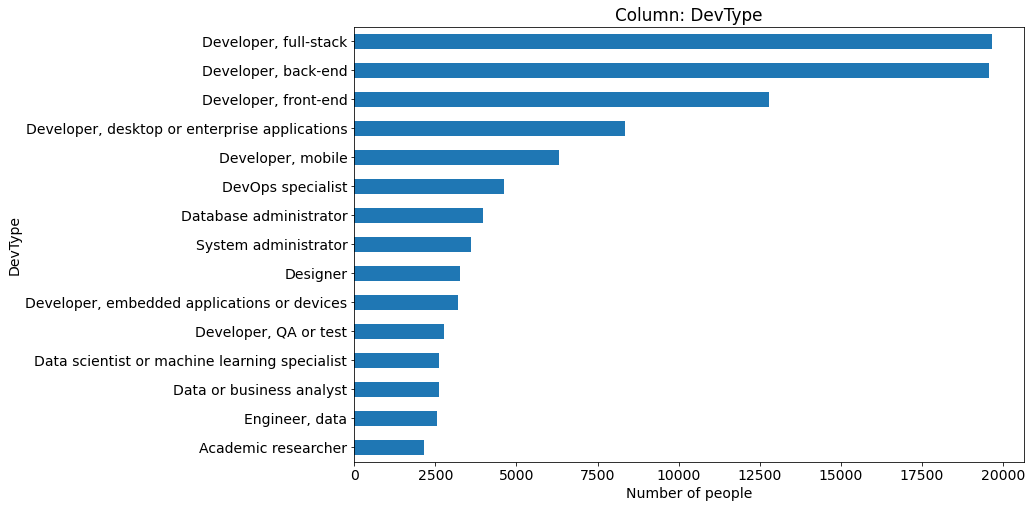

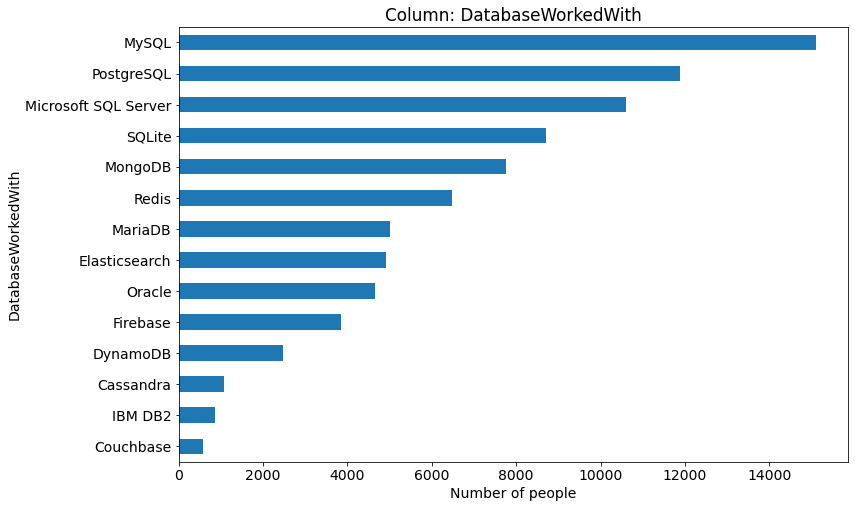

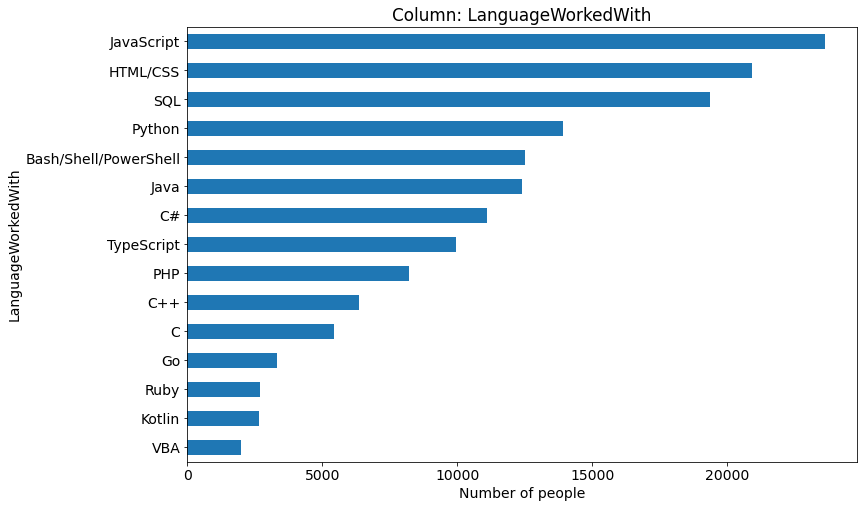

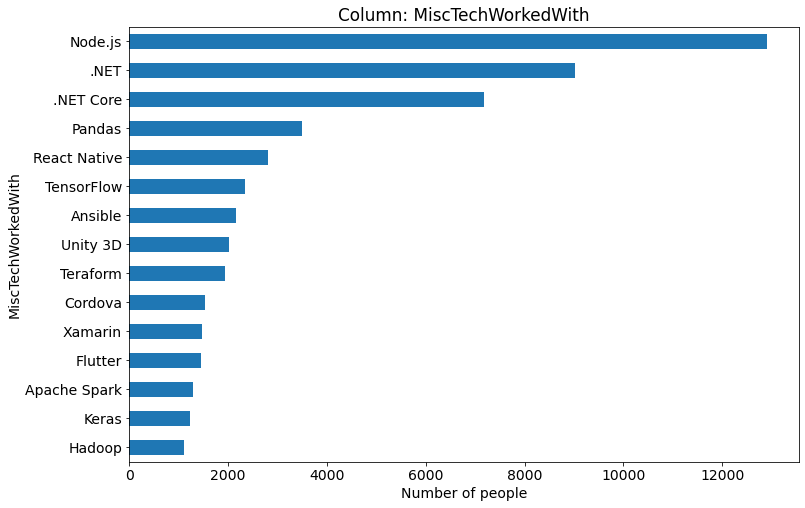

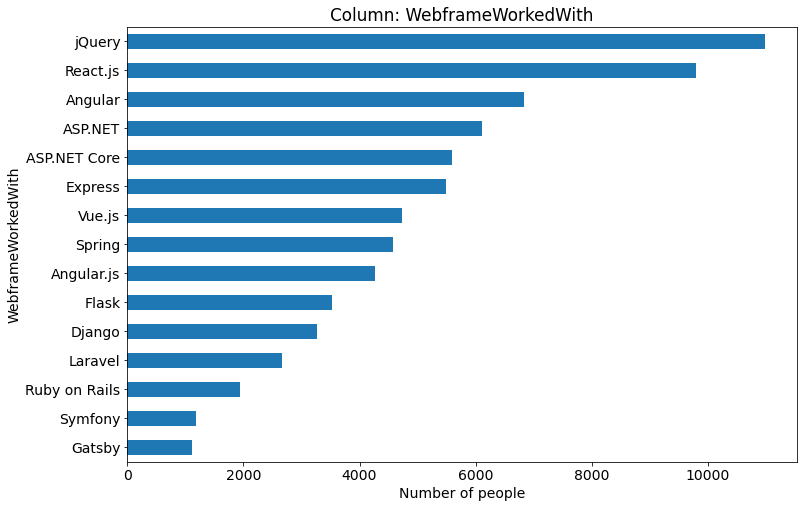

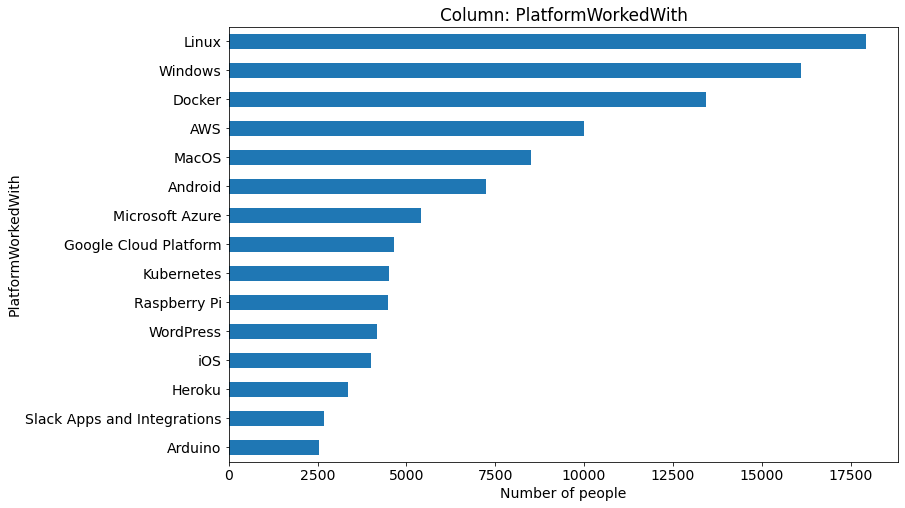

In [37]:
dummy_series_to_plot = [
    dev_type,
    db_worked_with,
    lang_worked_with,
    misc_worked_with,
    webframe_worked_with,
    platform_worked_with
]

for serie in dummy_series_to_plot:
    plot_serie(serie, is_dummy=True)

Aaand yes, this shows quite good the dev type, language and tech stack popularity. Just keep in mind that one person may have pointed multiple features of each type, hence total sum is different than total number of people.

---

Number of people by company size:

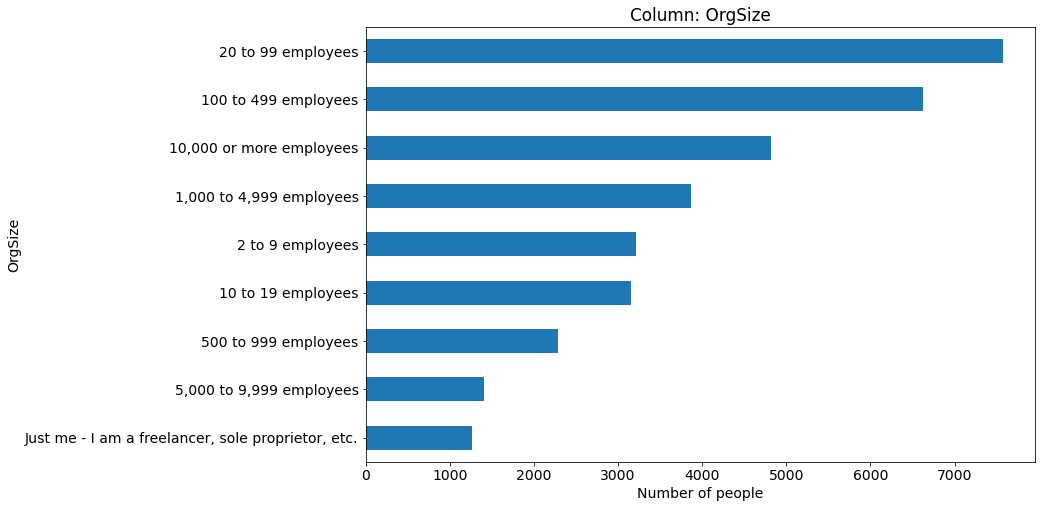

In [38]:
plot_serie(so_relevant_data["OrgSize"])

Hmm... Nothing obvious here. We could search for some correlations.

---

Number of people by country:

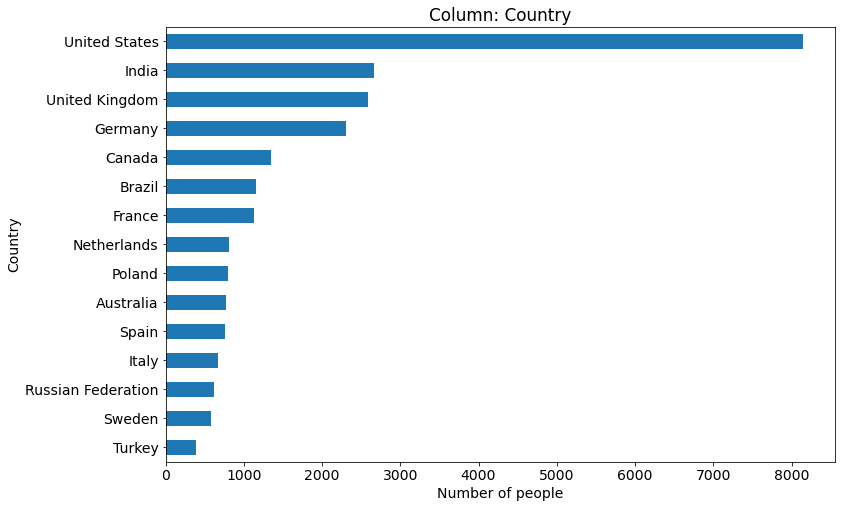

In [39]:
plot_serie(so_relevant_data["Country"])

Someone would say surveyed people are proportional to the country population, but then we have India, one of the most populated countries, with so low number of programmers... Maybe there is something else.

---

Number of people by education level:

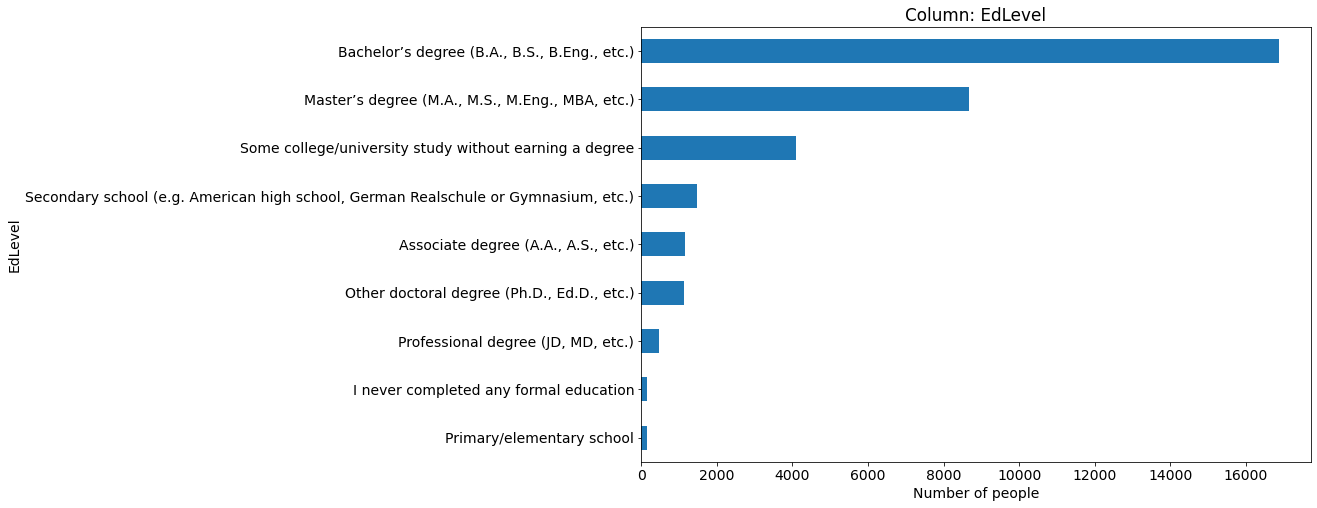

In [40]:
plot_serie(so_relevant_data["EdLevel"])

It's definitely clear that most programmers tend to be college/university graduates, e.g. have higher education, but not so much doctorial and professorial level.  
Could higher educational level relate to higher paycheck?

---

Number of people by coding work experience:

In [41]:
so_relevant_data["YearsCodePro"].value_counts()

3     3586
2     3506
5     3014
4     2778
6     2160
      ... 
46       5
50       4
47       3
48       2
49       1
Name: YearsCodePro, Length: 52, dtype: int64

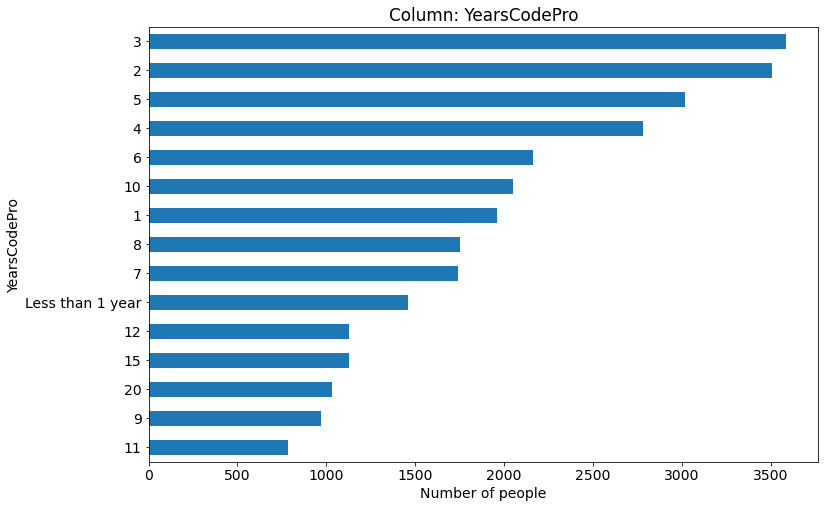

In [42]:
plot_serie(so_relevant_data["YearsCodePro"])

Seems that most have less than 10 years of coding experience, but it's curious that there are some people working since the dawn of programming

---

### 3.2. Glassdoor data exploration

#### Job Title

In [43]:
job_title = glassdoor_relevant_data["Job Title"]
job_title.value_counts()

Data Analyst                                                           1384
Data Engineer                                                           729
Business Analyst                                                        518
Data Scientist                                                          282
Senior Data Analyst                                                     239
                                                                       ... 
Business Intelligence Data Modeler/Analyst                                1
Data Scientist/Analyst - Wilbur Labs                                      1
Data Analyst Chemist - Quality System Contractor                          1
Data Analyst, Remote East Coast                                           1
Patient Safety Physician or Safety Scientist - UK, Europe or the US       1
Name: Job Title, Length: 7211, dtype: int64

A lot of job titles, but with the magic of RegEx, we could extract the general types.  
In order to do that, we will add dummy columns for each general type - *Data Engineer, Data Analyst, ML Engineer, Data Scientist*, then search for keywords and fill them up.

In [44]:
glassdoor_relevant_data.insert(column="Data Scientist", value=False , loc=1)
glassdoor_relevant_data.insert(column="ML Engineer", value=False , loc=1)
glassdoor_relevant_data.insert(column="Data Analyst", value=False , loc=1)
glassdoor_relevant_data.insert(column="Data Engineer", value=False , loc=1)

In [45]:
regex_analyst = "(?i)analy\w+"
regex_data_engineer = "(?i)data engineer"
regex_ML_engineer = "/ML|(?i)machine learning|(?i)model\w+"
regex_data_scientist = "(?i)scientist|(?i)science"

In [46]:
glassdoor_relevant_data["Data Analyst"] = glassdoor_relevant_data["Data Analyst"].mask(glassdoor_relevant_data["Job Title"].str.contains(regex_analyst), other= True)
glassdoor_relevant_data["Data Engineer"] = glassdoor_relevant_data["Data Engineer"].mask(glassdoor_relevant_data["Job Title"].str.contains(regex_data_engineer), other = True)
glassdoor_relevant_data["ML Engineer"] = glassdoor_relevant_data["ML Engineer"].mask(glassdoor_relevant_data["Job Title"].str.contains(regex_ML_engineer), other = True)
glassdoor_relevant_data["Data Scientist"] = glassdoor_relevant_data["Data Scientist"].mask(glassdoor_relevant_data["Job Title"].str.contains(regex_data_scientist), other = True)

In [47]:
no_job_category = glassdoor_relevant_data[
    (glassdoor_relevant_data["Data Analyst"] == False) & 
    (glassdoor_relevant_data["Data Scientist"] == False) & 
    (glassdoor_relevant_data["Data Engineer"] == False) & 
    (glassdoor_relevant_data["ML Engineer"] == False)
]
no_job_category

,Job Title,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Salary Estimate,Job Description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
63,TGS Central Teams Business Partner - Supply Chain Planning Lead,False,False,False,False,$81K-$159K (Glassdoor est.),Job Description Summary\nThe role of the Supply Chain Planning Business Partner lead is to serve...,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
260,Business Development (Institutional Investors),False,False,False,False,$51K-$95K (Glassdoor est.),"As a business development executive at Second Measure, you'll work with some of the world's larg...","New York, NY","San Mateo, CA",51 to 200 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
325,Business Manager (Must speak Chinese / Mandarin),False,False,False,False,$80K-$90K(Employer est.),Role and Responsibility\nResponsible for developing and costing retail ready product for Allied ...,"Commerce, CA","Detroit, MI",1 to 50 employees,2008,Company - Public,-1,-1,Less than $1 million (USD)
331,Business Manager,False,False,False,False,$80K-$90K(Employer est.),Johnsonville products are available in retail stores in all 50 states. As a member of this sales...,"Los Angeles, CA","Sheboygan Falls, WI",1001 to 5000 employees,1945,Company - Private,Food & Beverage Manufacturing,Manufacturing,$1 to $2 billion (USD)
333,Business Manager,False,False,False,False,$80K-$90K(Employer est.),We are a new laser tag in West Covina! We have 11 other locations in Russia with a 4.7 rating fr...,"West Covina, CA","West Covina, CA",Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15866,Data Architect II,False,False,False,False,$54K-$88K (Glassdoor est.),"Data Architect IILocation: Jacksonville, FLDuration: 3 monthsDescription:Bachelors Degree Prefer...","Jacksonville, FL","Troy, MI",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
15881,Big Data Solution Architect Consultant,False,False,False,False,$66K-$130K (Glassdoor est.),The Company\n\nACTS has been a high-tech business partner and innovator for nearly two decades. ...,"Jacksonville, FL","Fort Washington, PA",5001 to 10000 employees,1971,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
15956,Sr. Big data Ebgineer,False,False,False,False,$100K-$172K (Glassdoor est.),"Role : -Big Data Engineer/Tech Lead\n\nJob type:-Fulltime\n\nJob Location:-Irving, TX\n\nJob Des...","Irving, TX","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD)
15973,Sr. Data Architect (contract-to-hire),False,False,False,False,$100K-$172K (Glassdoor est.),Join this growing company in the Financial Services industry. You will have responsibility for t...,"Irving, TX",-1,-1,-1,-1,-1,-1,-1


Now we have a lump of postings we couldn't categorize, but we can see a lot of *Architects*, *Data "Something" engineer* and some *Data "something"*  we could try to assign to one of the main categories

In [48]:
regex_architects = "(?i)archite\w+"
architects_with_no_match = no_job_category[no_job_category["Job Title"].str.contains(regex_architects)]
len(architects_with_no_match)

45

Not much, but we already started it, so lets just assign them where appropriate. But where? Maybe we detected something else with prior searches.

In [49]:
all_architects = glassdoor_relevant_data[glassdoor_relevant_data["Job Title"].str.contains(regex_architects)]
architect_positions = all_architects.filter(["Data Engineer", "Data Scientist", "Data Analyst", "ML Engineer"], axis=1)
len(architect_positions)


114

We did. Lets see their distribution:

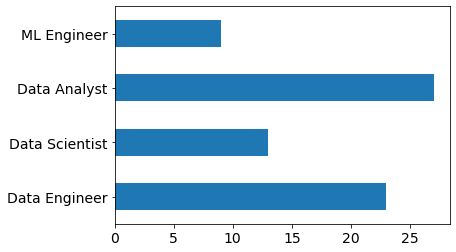

In [50]:
architect_positions.sum().plot(kind='barh')
plt.show()

Mostly Data engineers. I guess we could designate all unknown architects as Data Engineers.

In [51]:
glassdoor_relevant_data["Data Engineer"] = glassdoor_relevant_data["Data Engineer"].mask(glassdoor_relevant_data["Job Title"].str.contains(regex_architects), other= True)

Now, designate all previously untagged data-something-engineers:

In [52]:
pd.options.mode.chained_assignment = None
# Since this command is overwriting a sub-set of the main dataframe, a SettingWithCopyWarning appears, but this is exactly what 
# is done here - fixing only what is not designated originally, then update the main dataframe with it.
# If this was applied to the main dataframe, the RegEx will catch a lot of stuff which shouldnt.

regex_data_something_engineer = "(?i)data.* (?i).*engineer|(?i)engineer.* (?i).*data|(?i)intelligence (?i)engineer"
no_job_category["Data Engineer"] = no_job_category["Data Engineer"].mask(no_job_category["Job Title"].str.contains(regex_data_something_engineer), other = True)
glassdoor_relevant_data["Data Engineer"].update(no_job_category["Data Engineer"])

Now lets see what's left:

In [53]:
no_job_category = glassdoor_relevant_data[
    (glassdoor_relevant_data["Data Analyst"] == False) & 
    (glassdoor_relevant_data["Data Scientist"] == False) & 
    (glassdoor_relevant_data["Data Engineer"] == False) & 
    (glassdoor_relevant_data["ML Engineer"] == False)
]
no_job_category["Job Title"].value_counts()

Software Engineer                             93
Systems Engineer                              13
Data Architect II                             11
Quantitative Researcher                       10
Cloud Engineer                                 9
                                              ..
Mid Level SSDS Integration & Test Engineer     1
Associate Software Engineer                    1
Cleaning Validation Engineer                   1
Building Controls Engineer                     1
JPSC-6511 - Big Data Consultant                1
Name: Job Title, Length: 824, dtype: int64

Mostly software engineers, uncategorized. We could add another column "Other software engineers"

In [54]:
glassdoor_relevant_data.insert(column="Other Software Engineers", value=False , loc=5)
no_job_category.insert(column="Other Software Engineers", value=True , loc=5)
glassdoor_relevant_data["Other Software Engineers"].update(no_job_category["Other Software Engineers"])

Now, finally, let's see positions by category:

In [55]:
positions_by_type = glassdoor_relevant_data[[
    'Data Engineer',
    'Data Analyst',
    'ML Engineer',
    'Data Scientist',
    'Other Software Engineers'
]].sum()

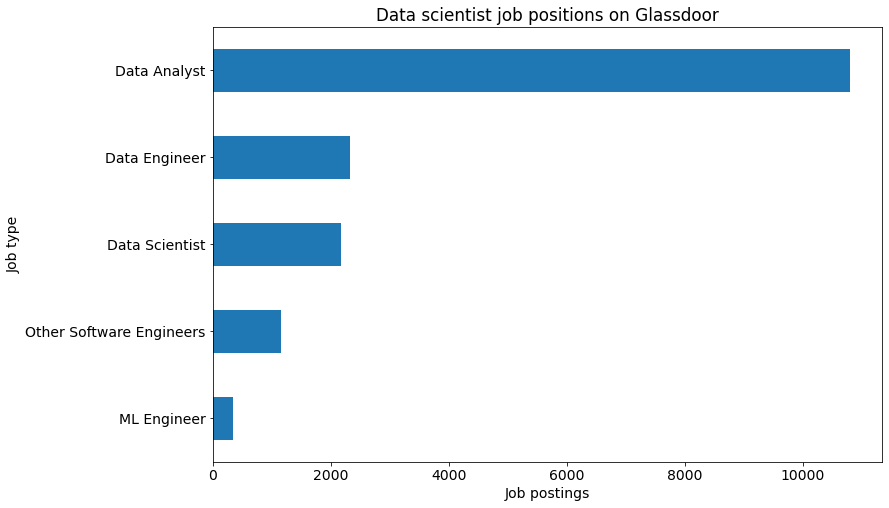

In [56]:
positions_by_type.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.ylabel("Job type")
plt.xlabel("Job postings")
plt.title("Data scientist job positions on Glassdoor")
plt.show()

Basically we could merge ML engineers, which are very few, with Data Scientists, since these categories are merged in the Stack Overflow survey.

Another thing to extract from the Job title is seniority position and insert a new column with this data.

In [57]:
regex_mid = r"\b(?i)mid\b"
regex_senior = r"\b(?i)sr\b|\b(?i)senior\b"
regex_junior_intern = r"\b(?i)jr\b|\b(?i)junior\b|(?i)intern\b|(?i)internship\b"

In [58]:
mid_positions = glassdoor_relevant_data["Job Title"].str.contains(regex_mid)
senior_positions = glassdoor_relevant_data["Job Title"].str.contains(regex_senior)
junior_positions = glassdoor_relevant_data["Job Title"].str.contains(regex_junior_intern)

In [59]:
glassdoor_relevant_data.insert(column="Position", loc=6, value=np.nan)
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(junior_positions, other="Junior")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(mid_positions, other="Mid")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(senior_positions, other="Senior")

In [60]:
# Total filled cells with seniority position
len(glassdoor_relevant_data[glassdoor_relevant_data["Position"].notnull()])

3164

In [61]:
# Total positions
len(glassdoor_relevant_data)

16160

Unfortunately, most of Mid's are not mentioned, thus our "Position" column is a bit underdeclared. We can either fill all unknown as Mid, or we could cross-check with anything we could find in "Job Description"

Something else to do to expand the search is the seniority engineering rank system - Staff engineer, Principal, VP, CTO, etc... Usually all of these are categorized as "Senior"

In [62]:
regex_staff = "(?i)staff"
regex_principal = "(?i)principal"
regex_chief_cto = "(?i)chief|\b(?i)cto\b"
regex_vice_president = "(?<!(?i)assistant )((?i)vice president)"
regex_manager_director = "(?i)director|(?i)manager"

In [63]:
staff = glassdoor_relevant_data["Job Title"].str.contains(regex_staff)
principal = glassdoor_relevant_data["Job Title"].str.contains(regex_principal)
chief = glassdoor_relevant_data["Job Title"].str.contains(regex_chief_cto)
vp = glassdoor_relevant_data["Job Title"].str.contains(regex_vice_president)
manager = glassdoor_relevant_data["Job Title"].str.contains(regex_manager_director)

warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.')

C:\Users\ebasii\AppData\Local\Temp\ipykernel_372\2096390674.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  vp = glassdoor_relevant_data["Job Title"].str.contains(regex_vice_president)


In [64]:
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(staff, other="Senior")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(principal, other="Senior")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(vp, other="Senior")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(chief, other="Senior")
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(manager, other="Senior")

In [65]:
# Total filled cells with seniority position
len(glassdoor_relevant_data[glassdoor_relevant_data["Position"].notnull()])

3694

Still not enough. Lets look at job description

---

#### Job description:

In [66]:
job_description = glassdoor_relevant_data["Job Description"]
job_description.head(3)

0    Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...
1    We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...
2    For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...
Name: Job Description, dtype: object

In [67]:
len(job_description)

16160

In [68]:
len(job_description.unique())

13280

There is a lot of information in the description, no matter how deep you go there is more. It will be quite difficult to extract everything we had in the stack overflow dataframe, e.g. languages, tech, etc...  
But we can extract required experience level, perhaps not very accurately, but we can do it.  
There seem to be some which are repeating / replicated. Maybe its worth to check if they are really absolute duplicates and get rid of them.

In [69]:
duplicates = glassdoor_relevant_data[glassdoor_relevant_data[["Job Title","Job Description"]].duplicated()]
len(duplicates)

2808

Yeah, we should drop them.

In [70]:
glassdoor_relevant_data = glassdoor_relevant_data.drop(index=duplicates.index)

Now lets extract whatever we can about experience:

In [71]:
regex_key = r"(\d*\s*(-*|to*)\s*\d+\+*\s*years*|\(\d\)\s*years)"

This key should catch any phrase mentioning X years, usually some kind of experience - job experience, tech experience, etc...  
But sometimes it could catch company age or something, so, as we already know, most experience is up to 10 years, and honestly, It'd be quite inadequate if requred experience is more than that.  
We can eliminate everything more than 10 years.

Regex catchphrases examples:

In [72]:
re.findall(regex_key, glassdoor_relevant_data["Job Description"][2667])

[('(2) years', ''),
 ('(4) years', ''),
 ('(2) years', ''),
 ('(4) years', ''),
 ('(6) years', ''),
 ('(8) years', ''),
 (' 15 years', '')]

In [73]:
re.findall(regex_key, glassdoor_relevant_data["Job Description"][11211])

[(' 1 year', ''), (' 1 year', ''), ('t 1 year', 't')]

In [74]:
glassdoor_relevant_data["Job Description"] = glassdoor_relevant_data["Job Description"].str.replace(r"\n+", " ")
experience = glassdoor_relevant_data["Job Description"].str.extractall(regex_key).add_prefix('years')

C:\Users\ebasii\AppData\Local\Temp\ipykernel_372\1034169125.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  glassdoor_relevant_data["Job Description"] = glassdoor_relevant_data["Job Description"].str.replace(r"\n+", " ")


In [75]:
experience

years0 years1
      match                     
0     0         2-4 years      -
2     0      1 to 3 years     to
4     0         1-2 years      -
5     0          4+ years    NaN
      1          5+ years    NaN
...                   ...    ...
16157 0          3+ years    NaN
      1          3+ years    NaN
16158 0          3+ years    NaN
      1          3+ years    NaN
16159 0           2 years    NaN

[16980 rows x 2 columns]

A bit house-keeping (clean text):

In [76]:
experience = experience["years0"].str.replace(r"years*", "")
experience = experience.groupby(level=0).apply(lambda x: x.str.replace("to", "-"))
experience = experience.groupby(level=0).apply(lambda x: x.str.strip("+() to"))

C:\Users\ebasii\AppData\Local\Temp\ipykernel_372\1651339613.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  experience = experience["years0"].str.replace(r"years*", "")


In [77]:
experience = experience.groupby(level=0).apply(list)

In [78]:
def extract_and_average_valid_experience(item):
    """
    This function is to be applied on a year range data series from a RegEx years of experience string search,
    each match grouped in a list. It is quite specific. Should not be used on other context.
    
    The function gets all matches from a list, then for each match splits by "-" (if applicable) 
    and strips any leftover excess spaces. In any case the result symbol/group is checked if its a number
    and is parsed to integer for the next operations and return data type.
    
    Groups of the type, e.g. [4-6, 8-10, 5] (years) are averaged to, respectively, 5, 9, 5 years
    and then averaged between these results and returns out the total average result of 7 years of experience.
    
    Years above 10 are filtered out, as it's considered inadequate requirement and is more likely company age
    
    Returns None if none found.
    """
    categories = []
    for yr_range in item:
        category = []
        yrs = yr_range.split("-")
        for yr in yrs:
            yr = yr.strip()
            if yr.isnumeric():
                yr = int(yr)
                if yr <= 10:
                    category.append(yr)
        if category:
            avg_cat_range = sum(category)/len(category)
            categories.append(avg_cat_range)
    if categories:
        total_average = sum(categories)/len(categories)
        return total_average

In [79]:
experience = experience.apply(extract_and_average_valid_experience)
experience

0        3.000000
2        2.000000
4        1.500000
5        4.500000
7        4.500000
           ...   
16151    2.714286
16155    5.000000
16157    3.000000
16158    3.000000
16159    2.000000
Name: years0, Length: 8993, dtype: float64

Now we have some experience to compare stuff with. Not perfect, but it should be good enough. Let's just add it to the dataframe.

In [80]:
glassdoor_relevant_data.insert(column="Experience by description", loc=9, value=experience)

In [81]:
glassdoor_relevant_data

,Job Title,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Other Software Engineers,Position,Salary Estimate,Job Description,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,False,True,False,False,False,NaN,$56K-$102K (Glassdoor est.),"Company Overview At Memorial Sloan Kettering (MSK), we’re not only changing the way we treat can...",3.0,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
1,Business Analyst,False,True,False,False,False,NaN,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,NaN,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable
2,Data Analyst,False,True,False,False,False,NaN,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",2.0,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD)
3,"Information Security Analyst, Incident Response",False,True,False,False,False,NaN,$56K-$102K (Glassdoor est.),Job Description Summary The Information Security Analyst will be a member of the BD Security Ope...,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
4,Analyst - FP&A Global Revenue,False,True,False,False,False,NaN,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,1.5,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16154,Cyber Security Data Engineer,True,False,False,False,False,NaN,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment company that provides hiring solutions faster than ...,NaN,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16155,AWS Data Engineer,True,False,False,False,False,NaN,$55K-$112K (Glassdoor est.),About Us Tachyon Technologies is a Digital Transformation consulting firm that partners with bus...,5.0,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
16157,Security Analytics Data Engineer,True,True,False,False,False,NaN,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.0,"Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
16158,Security Analytics Data Engineer,True,True,False,False,False,NaN,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",3.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD)


Now we can continue with defining seniority. It should be quite easy if we assume that if experience is not required - it must be a junior position. If it is required - then it should be either Mid or Senior.  
Since we already cleaned up Seniors, for the sake of siplicity, we will assume the following:  
required experience => Mid  
not required experience => Junior

In [82]:
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(glassdoor_relevant_data["Position"].isnull() & glassdoor_relevant_data["Experience by description"].notnull(), other="Mid")

In [83]:
glassdoor_relevant_data["Position"] = glassdoor_relevant_data["Position"].mask(glassdoor_relevant_data["Position"].isnull() & glassdoor_relevant_data["Experience by description"].isnull(), other="Junior")

In [84]:
glassdoor_relevant_data["Position"].value_counts(dropna=False)

Mid       6581
Junior    4089
Senior    2682
Name: Position, dtype: int64

Alright. Everything filled up.

---

#### Salary estimate

We can't work with strings, so better extract the numbers - min, max and we can make one additional - average between them.

In [85]:
split_salary = glassdoor_relevant_data["Salary Estimate"].str.extractall(r"(\d+)")[0].unstack().add_prefix('Salary').astype(float)

In [86]:
split_salary

match,Salary0,Salary1
0,56.0,102.0
1,56.0,102.0
2,56.0,102.0
3,56.0,102.0
4,56.0,102.0
...,...,...
16154,55.0,112.0
16155,55.0,112.0
16157,55.0,112.0
16158,55.0,112.0


In [87]:
glassdoor_relevant_data.columns

Index(['Job Title', 'Data Engineer', 'Data Analyst', 'ML Engineer',
       'Data Scientist', 'Other Software Engineers', 'Position',
       'Salary Estimate', 'Job Description', 'Experience by description',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')

In [88]:
desired_column_order = ['Job Title', 'Data Engineer', 'Data Analyst', 'ML Engineer',
       'Data Scientist', 'Other Software Engineers', 'Position',
       'Salary Estimate', 'Job Description', 'Salary0', 'Salary1', 'Experience by description',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue']

In [89]:
glassdoor_relevant_data = glassdoor_relevant_data.join(split_salary, on=glassdoor_relevant_data.index)


In [90]:
glassdoor_relevant_data = glassdoor_relevant_data[desired_column_order]


In [91]:
glassdoor_relevant_data = glassdoor_relevant_data.rename(columns={"Salary0": "Salary Min", "Salary1": "Salary Max"})

In [92]:
glassdoor_relevant_data = glassdoor_relevant_data.drop(columns="Salary Estimate")

In [93]:
glassdoor_relevant_data.insert(column="Salary Average", value=(glassdoor_relevant_data["Salary Min"]+glassdoor_relevant_data["Salary Max"])/2, loc=10)

In [94]:
glassdoor_relevant_data.head(1)

,Job Title,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Other Software Engineers,Position,Job Description,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,False,True,False,False,False,Mid,"Company Overview At Memorial Sloan Kettering (MSK), we’re not only changing the way we treat can...",56.0,102.0,79.0,3.0,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)


#### Company size

This column looks nice, nothing much to fix, just replace "-1" with "Unknown" for better looks

In [95]:
glassdoor_relevant_data["Size"] = glassdoor_relevant_data["Size"].replace(to_replace="-1", value="Unknown")

In [96]:
glassdoor_relevant_data["Size"].value_counts()

10000+ employees           2840
51 to 200 employees        2394
1001 to 5000 employees     2120
1 to 50 employees          1797
201 to 500 employees       1367
501 to 1000 employees      1081
Unknown                    1041
5001 to 10000 employees     712
Name: Size, dtype: int64

---

#### Company revenue

This column looks nice, nothing much to fix, just replace "-1" with "Unknown" for better looks

In [97]:
glassdoor_relevant_data["Revenue"] = glassdoor_relevant_data["Revenue"].replace(to_replace="-1", value="Unknown / Non-Applicable")

In [98]:
glassdoor_relevant_data["Revenue"].value_counts()

Unknown / Non-Applicable            4274
$10+ billion (USD)                  1635
$100 to $500 million (USD)          1333
$50 to $100 million (USD)           1026
$2 to $5 billion (USD)               752
                                    ... 
$1 to $2 billion (USD)               603
$5 to $10 billion (USD)              463
$500 million to $1 billion (USD)     435
Less than $1 million (USD)           435
$5 to $10 million (USD)              410
Name: Revenue, Length: 13, dtype: int64

---

#### Company founded

This column looks nice, nothing much to fix, just replace "-1" with "Unknown" for better looks

In [99]:
glassdoor_relevant_data["Founded"] = glassdoor_relevant_data["Founded"].replace(to_replace = [-1, "-1"], value="Unknown")

In [100]:
glassdoor_relevant_data["Founded"].value_counts()

Unknown    3563
2008        281
1999        249
2002        213
2008        212
           ... 
1837          1
1794          1
1776          1
1774          1
1866          1
Name: Founded, Length: 389, dtype: int64

---

## 4. Data analysis

### 4.1. Stack overflow survey data analysis

Let's compare salaries

In [101]:
database_worked_with__dummies = db_worked_with.str.get_dummies(";")
language_worked_with__dummies = lang_worked_with.str.get_dummies(";")
misc_worked_with__dummies = misc_worked_with.str.get_dummies(";")
platform_worked_with__dummies = platform_worked_with.str.get_dummies(";")
web_frame_worked_with__dummies = webframe_worked_with.str.get_dummies(";")
job_type__dummies = so_relevant_data["DevType"].str.get_dummies(";")

Now let's look at an example group, "Academic researcher" in this case (1st alphabetical)

In [102]:
condition = job_type__dummies["Academic researcher"].astype(bool)

In [103]:
so_relevant_data["ConvertedComp"][condition]

91         21620.0
110        65000.0
164        48644.0
194      1920000.0
205        90000.0
           ...    
63827      38916.0
63861      22620.0
63955       9612.0
64129     150000.0
64142        984.0
Name: ConvertedComp, Length: 2153, dtype: float64

We can immediately see an outlier #194  

Let's see how many are "Millionaires":

In [104]:
millionaires = so_relevant_data["ConvertedComp"][so_relevant_data["ConvertedComp"] > 500000]
millionaires

17       1260000.0
56       1620000.0
64       1176000.0
68        594539.0
121      2000000.0
           ...    
63890    2000000.0
63925    1000000.0
63993    1000000.0
64035    2000000.0
64057    2000000.0
Name: ConvertedComp, Length: 1226, dtype: float64

What?! 1226 earning more than $500K as software developer ?! Let's check if they are CEO's or something.

In [105]:
pd.options.display.float_format = '{:.1f}'.format
millionaires_data = stack_overflow_survey_2020.loc[millionaires.index]
millionaires_data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
17,18,I am a developer by profession,Yes,32.0,12,Monthly,105000.0,1260000.0,United States,United States dollar,USD,Elasticsearch;PostgreSQL;Redis;SQLite,Elasticsearch;MariaDB;MySQL;Redis;SQLite,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Office env...",Very satisfied,I am not interested in new job opportunities,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl,NaN,NaN,Github,Github;Slack,Not sure,Neutral,Very important,Looking to relocate,NaN,Once every few years,Yes,Onboarding? What onboarding?,Yes,Occasionally: 1-2 days per quarter but less than monthly,Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of top...,Play games;Visit Stack Overflow;Do other work and come back later,Linux-based,100 to 499 employees,Linux,AWS;Linux,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",I have never participated in Q&A on Stack Overflow,Daily or almost daily,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Just as welcome now as I felt last year,45.0,19,12
56,57,I am a developer by profession,No,44.0,12,Monthly,135000.0,1620000.0,United States,United States dollar,USD,SQLite,SQLite,"Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise application...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Industry that I’d be working in;Specific department or team I’d be working on;Office environment...,Very satisfied,"I’m not actively looking, but I am open to new opportunities",C#,C#;VBA,.NET;.NET Core,.NET,"Github;Trello;Google Suite (Docs, Meet, etc)","Github;Trello;Google Suite (Docs, Meet, etc)",No,Somewhat important,Fairly important,Just because;Curious about other opportunities,NaN,Once a decade,Yes,Onboarding? What onboarding?,Yes,Rarely: 1-2 days per year or less,Start a free trial;Visit developer communities like Stack Overflow;Read ratings or reviews on th...,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of top...,Visit Stack Overflow;Go for a walk or other physical activity;Watch help / tutorial videos;Do ot...,Windows,"10,000 or more employees",Android;Arduino;Windows,Windows,I have some influence,Straight / Heterosexual,Yes,"Yes, definitely",Daily or almost daily,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Just as welcome now as I felt last year,43.0,33,23
64,65,I am a developer by profession,Yes,34.0,13,Monthly,98000.0,1176000.0,United States,United States dollar,USD,Couchbase;Elasticsearch;Redis,Microsoft SQL Server,"Developer, back-end;Developer, front-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;How widely used or impa

Well. Just from the sample first5-last5 we can see there are errors due to payment frequencies or falsy data. Some of the payments may be true though. Let's check further.

For people from USA is clear enough. Their salaries are always yearly-based, but often weekly- or monthly-paid. That's an easy fix, I guess...

In [106]:
millionaires_data[["ConvertedComp", "CompTotal", "CompFreq", "CurrencyDesc"]].groupby(millionaires_data["Country"]).value_counts()

Country        ConvertedComp  CompTotal            CompFreq  CurrencyDesc        
Afghanistan    1000000.0      8000000.0            Weekly    Albanian lek            1
                              8740000000.0         Weekly    Afghan afghani          1
                              5521170819.0         Weekly    Afghan afghani          1
Argentina      1176000.0      98000.0              Monthly   United States dollar    1
Australia      921972.0       115000.0             Monthly   Australian dollar       4
                                                                                    ..
United States  1624800.0      135400.0             Monthly   United States dollar    1
               1560000.0      1560000.0            Yearly    United States dollar    1
               1404000.0      117000.0             Monthly   United States dollar    1
Uzbekistan     1000000.0      1425000000.0         Monthly   Uzbekistani som         1
Viet Nam       1000000.0      49585500483839344.

Mostly are either mistakes or just trolls. We can try to convert them from weekly or monthly to year-basis and after that get rid of trolls.

But we shouldnt ignore the top country economies income, mainly in Europe (e.g. Germany, UK, France) in which 500k per year may be plausible to some extent... We might also check USA and other leading economies (let's say Japan, Korea, Singapore, etc) on that as well...

Maybe we should see dispersions on top economies or top earners by country (without these outliers) and compare them to mean() and max() and fix them on that basis.

Let's drop them for now, as it's obvious it's incorrect data

In [107]:
no_millionaires = so_relevant_data.drop(millionaires.index)

In [108]:
condition = job_type__dummies['Academic researcher'].astype(bool)
data_statistics = no_millionaires["ConvertedComp"][condition].describe().to_dict()
data_statistics

{'count': 2096.0,
 'mean': 54206.69847328244,
 'std': 57827.2171356051,
 'min': 0.0,
 '25%': 16164.0,
 '50%': 38945.0,
 '75%': 70070.5,
 'max': 500000.0}

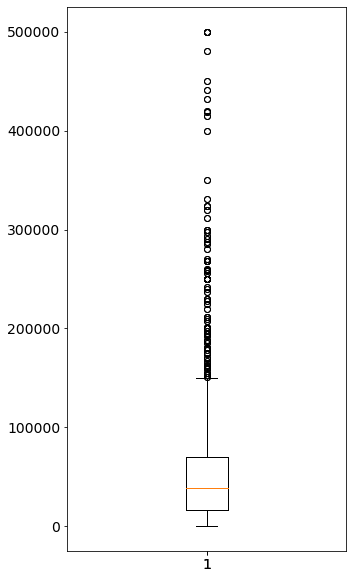

In [109]:
plt.figure(figsize=(5,10))
plt.boxplot(no_millionaires["ConvertedComp"][condition])
box = plt.boxplot(no_millionaires["ConvertedComp"][condition])
plt.show()

There are still a lot of outliers, but maybe acceptable by taking mean salary?

In [110]:
# Mean salaries by developer type
def get_mean_salary_by_factor(dataframe, factor_series):
    dummy_df = factor_series.str.get_dummies(";")
    series_dict = {}
    for column in dummy_df:
        condition = dummy_df[column].astype(bool)
        mean = dataframe["ConvertedComp"][condition].mean()
        series_dict[column] = mean
    return series_dict

In [111]:
average_salary = pd.DataFrame.from_dict(get_mean_salary_by_factor(no_millionaires, no_millionaires["DevType"]), orient='index', columns=["Average by DevType"])
average_salary["Average by DevType"].sort_values(ascending=False).to_dict()

{'Senior executive/VP': 105135.34569536425,
 'Engineering manager': 100222.51809210527,
 'Engineer, site reliability': 92728.66738816739,
 'Not specified': 81397.7955801105,
 'DevOps specialist': 77467.28308658591,
 'Engineer, data': 75986.31797798614,
 'Product manager': 71828.07662835249,
 'Developer, embedded applications or devices': 70880.13774014979,
 'Scientist': 70511.91597274791,
 'Data scientist or machine learning specialist': 70020.25430516619,
 'Marketing or sales professional': 68512.64838709678,
 'Developer, desktop or enterprise applications': 67242.77761249535,
 'Developer, full-stack': 66490.54477926457,
 'Developer, back-end': 66163.6324524313,
 'System administrator': 65864.07723459647,
 'Data or business analyst': 65305.555913113436,
 'Developer, QA or test': 63556.62867783985,
 'Developer, game or graphics': 63094.621848739494,
 'Database administrator': 62275.95603245224,
 'Educator': 62189.209251101325,
 'Developer, front-end': 60955.959841308395,
 'Designer': 5

In [112]:
average_salary = average_salary["Average by DevType"].sort_values(ascending=True)

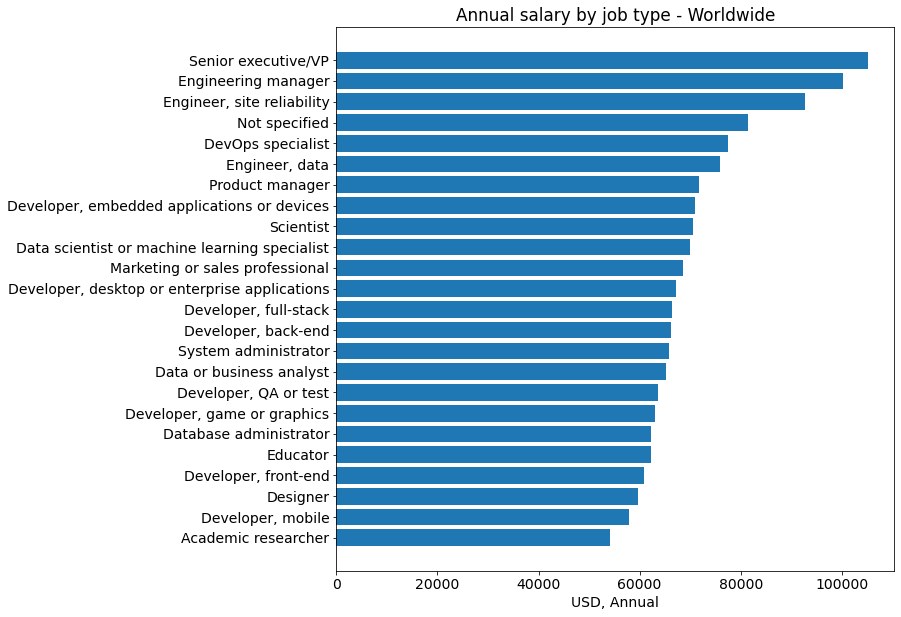

In [113]:
plt.figure(figsize=(10, 10))
plt.barh(average_salary.index, average_salary.values)
plt.xlabel("USD, Annual")
plt.title("Annual salary by job type - Worldwide")
plt.show()

In [114]:
data_bulgaria = so_relevant_data[so_relevant_data["Country"] == "Bulgaria"]

In [115]:
average_salary_bg = pd.DataFrame.from_dict(get_mean_salary_by_factor(data_bulgaria, data_bulgaria["DevType"]), orient='index', columns=["Average by DevType"])
average_salary_bg = average_salary_bg.drop("Not specified")
average_salary_bg = average_salary_bg["Average by DevType"].sort_values(ascending=True)

In [116]:
average_salary_bg.sort_values(ascending=False)

Marketing or sales professional               56364.0
Engineering manager                           53900.2
Product manager                               41459.4
Developer, embedded applications or devices   41243.5
DevOps specialist                             40977.4
                                                ...  
Engineer, data                                28663.7
Database administrator                        27744.8
Data or business analyst                      26438.4
Designer                                      25831.5
Academic researcher                           19365.0
Name: Average by DevType, Length: 23, dtype: float64

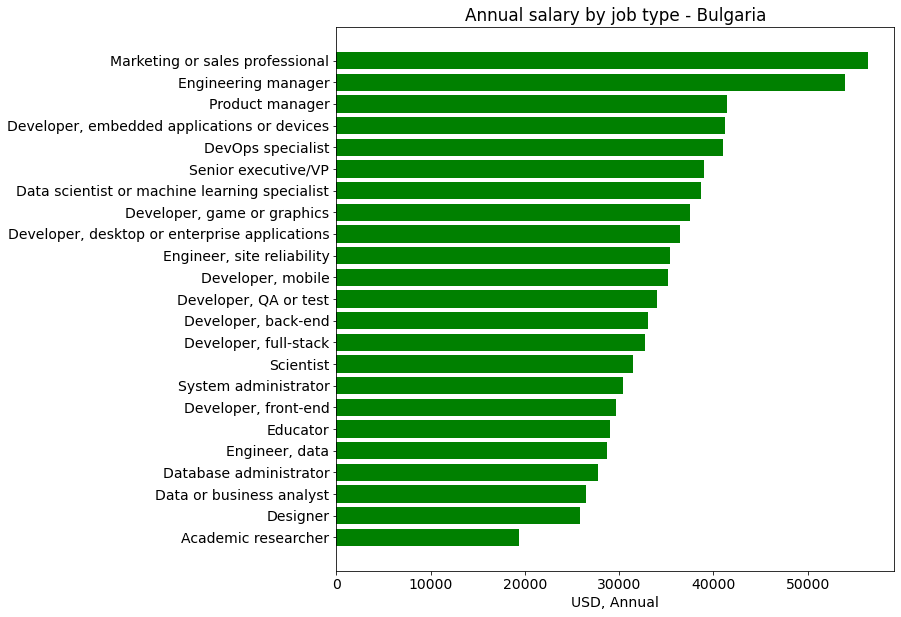

In [117]:
plt.figure(figsize=(10, 10))
plt.barh(average_salary_bg.index, average_salary_bg.values, color ='green')
plt.xlabel("USD, Annual")
plt.title("Annual salary by job type - Bulgaria")
plt.show()

In [118]:
def get_most_used_by_job_type(professional_series, factor_series):
    professional_types = professional_series.str.get_dummies(";").columns
    dummy_df = factor_series.str.get_dummies(";")
    serie_list = []
    for typ in professional_types:
        serie = pd.Series(dummy_df[professional_series == typ].sum(), name=typ)
        serie_sum = serie.sum()
        serie = serie.apply(lambda x: x/serie_sum*100)
        # print(serie.sum())
        serie_list.append(serie)
    return pd.DataFrame(serie_list)

In [119]:
professional_series = no_millionaires["DevType"]
factor_series = no_millionaires["DatabaseWorkedWith"]
professional_types = professional_series.str.get_dummies(";").columns
dummy_df = factor_series.str.get_dummies(";")
serie_list = []
for typ in professional_types:
    serie = pd.Series(dummy_df[factor_series == typ].sum(), name=typ)
    serie_list.append(serie)
# pd.DataFrame(serie_list)

In [120]:
palette = [
    "#333333",
    "#800000",
    "#808000",
    "#bc8f8f",
    "#4b0082",
    "#00ced1",
    "#ff8c00",
    "#006400",
    "#00ff00",
    "#0000ff",
    "#2f4f4f",
    "#1e90ff",
    "#ff1493",
    "#98fb98",
]
# 85% black    
# maroon   
# olive
# rosybrown
# indigo
# darkturquoise
# darkorange
# darkgreen
# lime
# blue
# darkslategray
# dodgerblue 
# deeppink
# palegreen


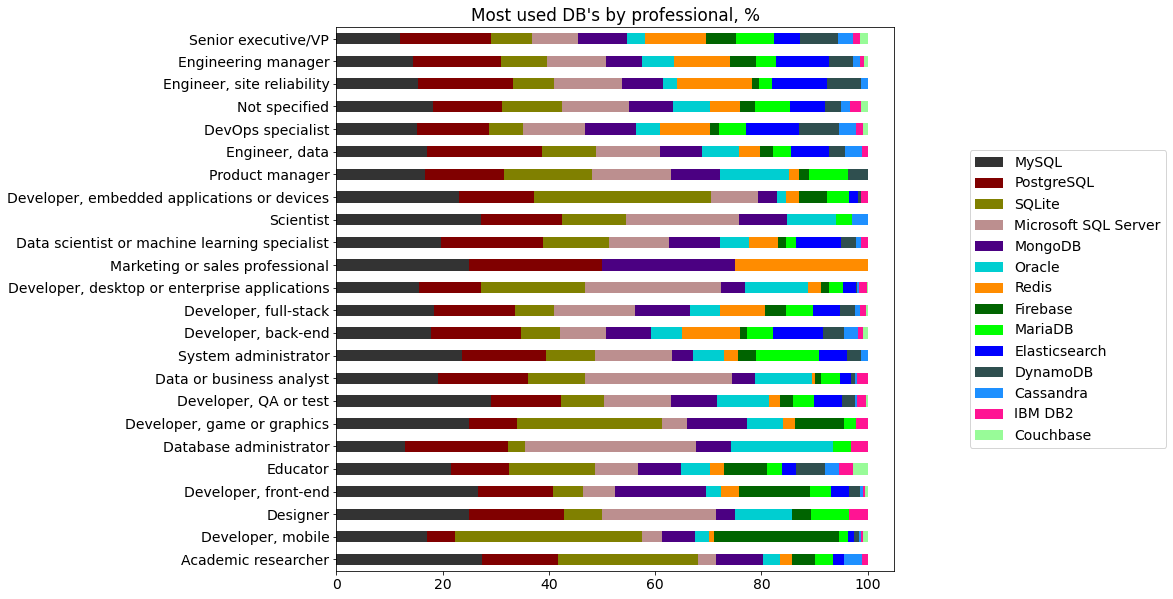

In [121]:
pd.options.display.float_format = '{:.3f}'.format
most_used_DB_by_professional = get_most_used_by_job_type(no_millionaires["DevType"], no_millionaires["DatabaseWorkedWith"])
most_used_DB_by_professional = most_used_DB_by_professional.loc[average_salary.index]
sort_df = most_used_DB_by_professional.sum().sort_values(ascending=False)
most_used_DB_by_professional[sort_df.index].plot(kind="barh", stacked=True, figsize=(10,10), color = palette)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.title("Most used DB's by professional, %")
plt.show()

In [122]:
def get_sort_and_plot_types_by_factor(professional_series, factor_series):
    most_used_features = get_most_used_by_job_type(professional_series, factor_series)
    
    #Sort features by most used
    sort_df_stack = most_used_features.sum().sort_values(ascending=False)
    
    try: #Sort by salary
        most_used_features = most_used_features.loc[average_salary.index]
    except Exception:
        print("Could not sort by salary")
    
    palette = ["#333333","#800000","#808000","#bc8f8f","#4b0082","#00ced1","#ff8c00","#006400","#00ff00","#0000ff","#2f4f4f","#1e90ff","#ff1493","#98fb98"]
    
    most_used_features[sort_df_stack.index].plot(kind="barh", stacked=True, figsize=(10,10), color = palette)
    plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
    plt.title(f"Most {factor_series.name} by {professional_series.name}, %")
    plt.show()

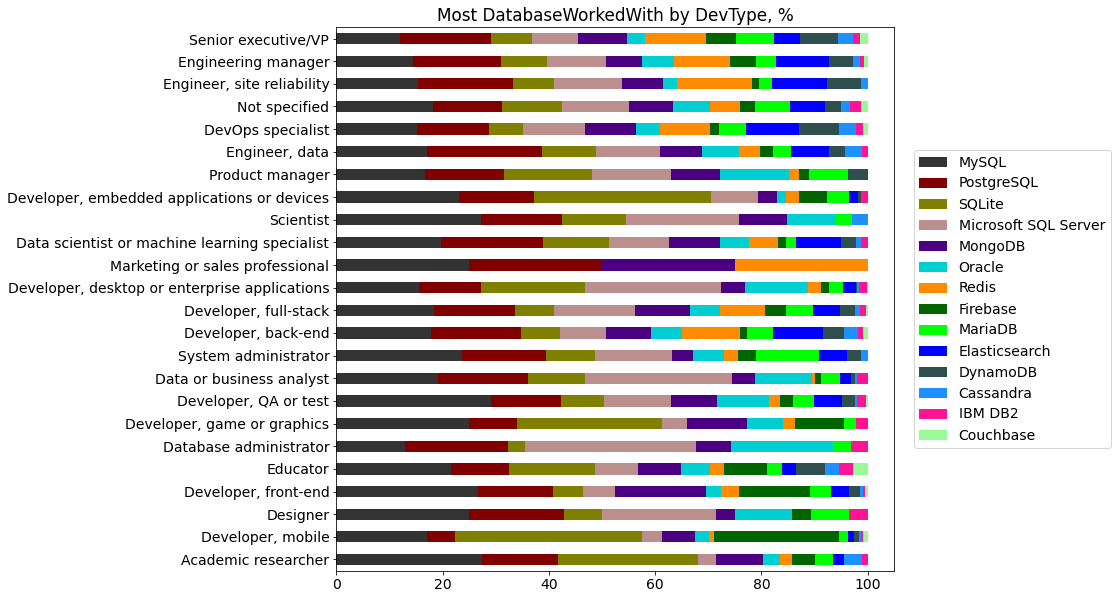

In [123]:
get_sort_and_plot_types_by_factor(no_millionaires["DevType"], no_millionaires["DatabaseWorkedWith"])

In [124]:
technologies_comparison_plot_list = ["DatabaseWorkedWith", "LanguageWorkedWith", "MiscTechWorkedWith", "PlatformWorkedWith", "WebframeWorkedWith"]

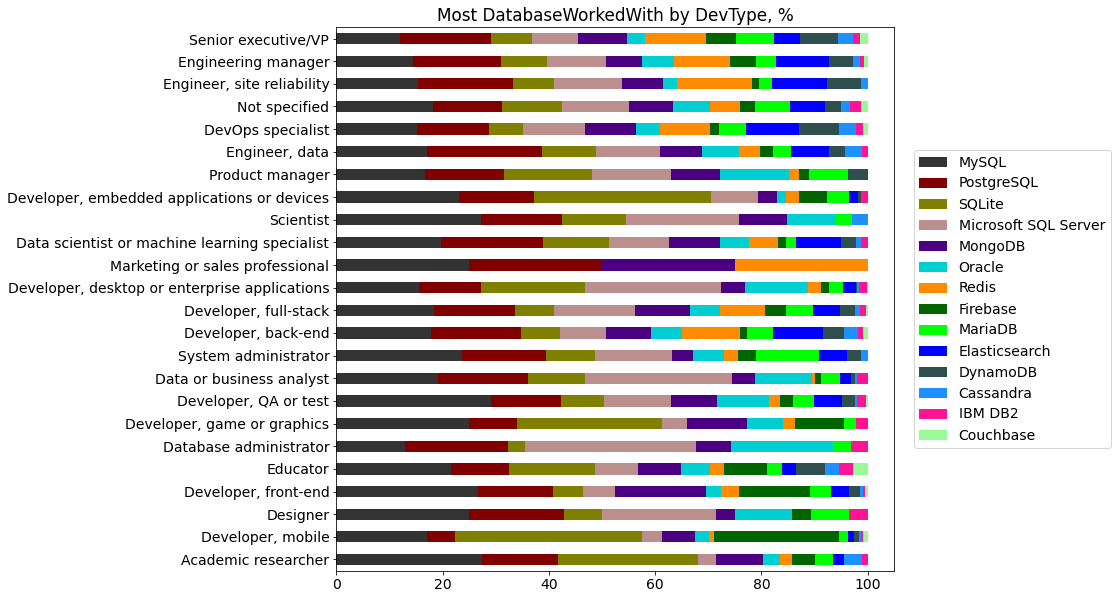

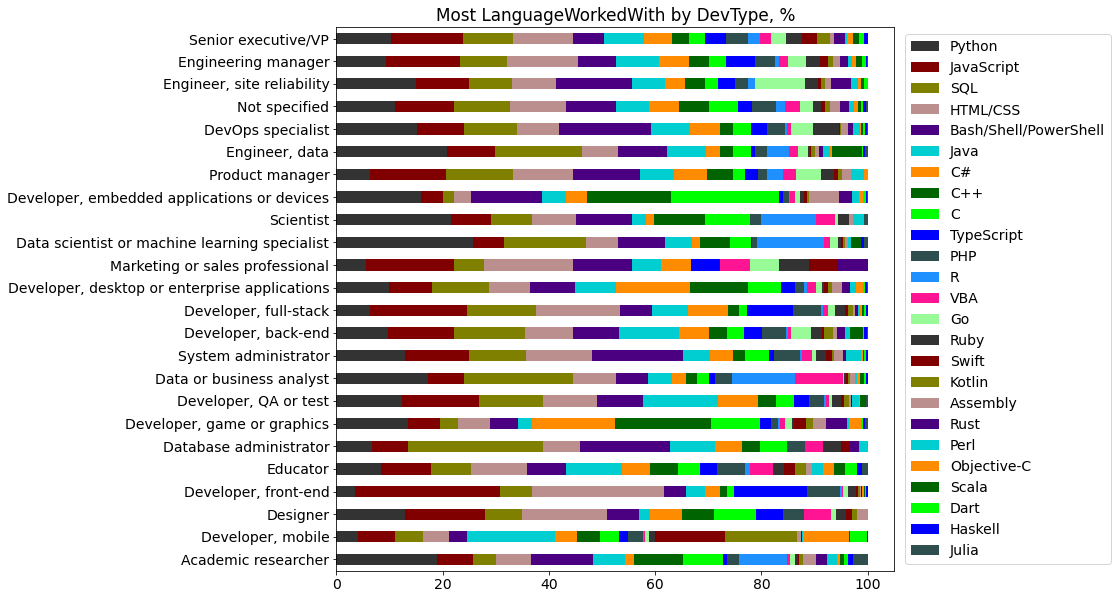

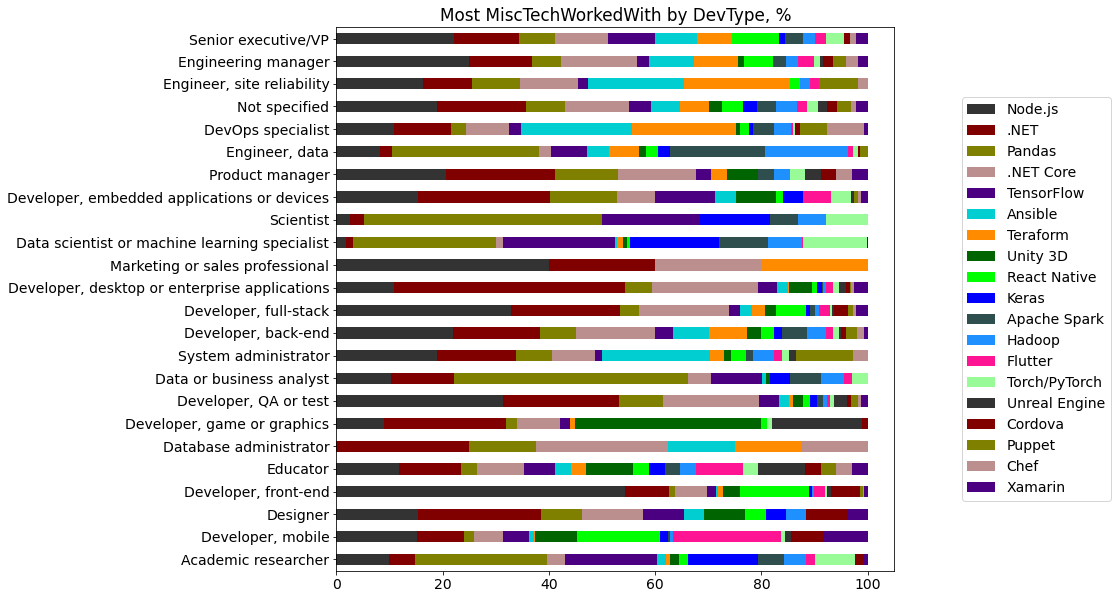

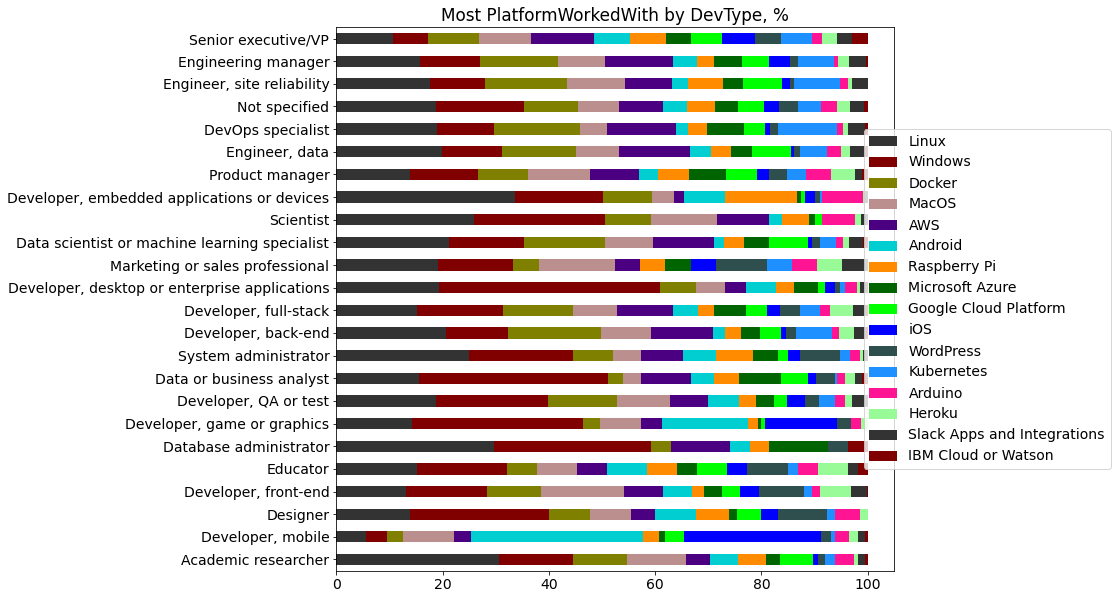

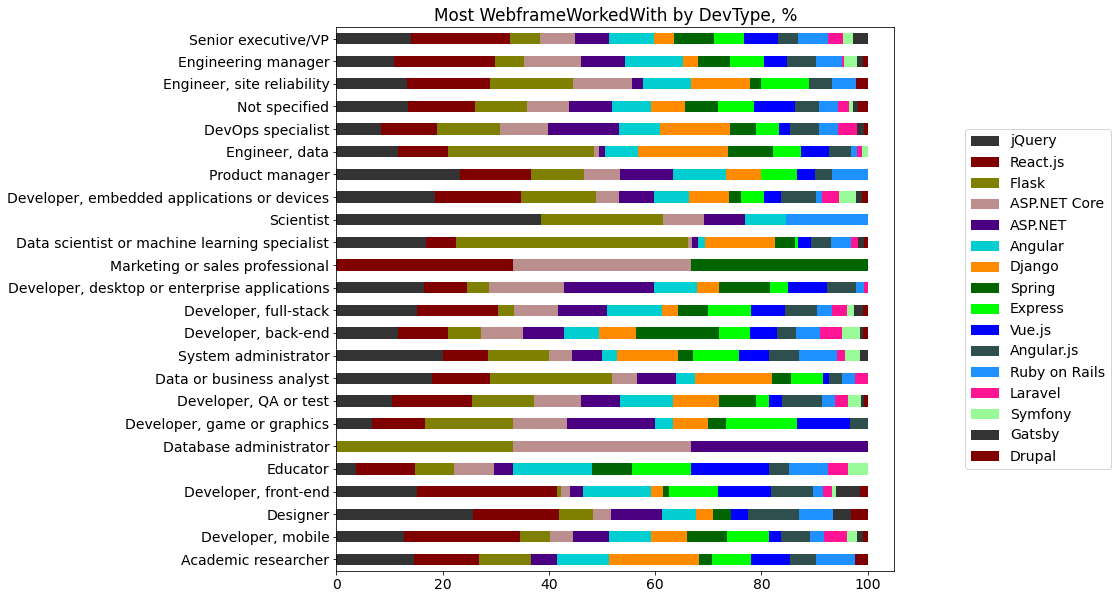

In [125]:
for plot in technologies_comparison_plot_list:
    get_sort_and_plot_types_by_factor(no_millionaires["DevType"], no_millionaires[plot])    

These plots represent total percentage of each technology/language a professional type.

#### 4.1.1 TODO:

- Most profitable professionals by country
- Most profitable technologies/languages
- Correlations between experience and salary
- Correlations salary vs technologies used
- Correlations for salaries from 2015 ~ 2022
- Model a prediction for 2023

### 4.2. Glassdoor data analysis

#### 4.2.1. TODO:
- A lot, similar to stackoverflow survey analysis


## 5. Conclusions: TODO

## 6. Sources:
1. [Stack Overflow Developer Surveys (2015-2020) from Kaggle](https://www.kaggle.com/datasets/haakakak/stack-overflow-developer-surveys-20152020)
2. [GitHub - User: picklesueat](https://github.com/picklesueat/data_jobs_data)